In [2]:
import numpy as np
import pandas as pd

import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
mpi_df = pd.read_csv('MPI_national.csv')
print(mpi_df.shape)
country_df = pd.read_csv('Country.csv')

(102, 8)


In [4]:
# in country dataset, remove line without region name
coutry_df = country_df[country_df.Region.isnull()==False]

# use only `CountryCode` and `Region` columns
df_region = country_df[['CountryCode', 'Region']]

df_region.head()

,CountryCode,Region
0,AFG,South Asia
1,ALB,Europe & Central Asia
2,DZA,Middle East & North Africa
3,ASM,East Asia & Pacific
4,ADO,Europe & Central Asia


In [5]:
# merge df of region to MPI df
mpi_with_region = pd.merge(mpi_df, df_region, left_on='ISO', right_on='CountryCode')

# create a new numerical column for RegionCode
mpi_with_region['RegionCode'] = mpi_with_region.Region.astype('category').cat.codes + 1

mpi_with_region.head()

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural,CountryCode,Region,RegionCode
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3,KAZ,Europe & Central Asia,2
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3,SRB,Europe & Central Asia,2
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1,KGZ,Europe & Central Asia,2
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7,TUN,Middle East & North Africa,4
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9,ARM,Europe & Central Asia,2


In [6]:
# extract data columns and target_label, target_name columns
df_data = mpi_with_region[['MPI Urban', 'Headcount Ratio Urban', 'Intensity of Deprivation Urban',
                           'MPI Rural', 'Headcount Ratio Rural', 'Intensity of Deprivation Rural']]
target_y = mpi_with_region['RegionCode'].tolist()
target_name = mpi_with_region['Country'].tolist()

In [7]:
# normalize or standardize dataframe
df_data_std = (df_data - df_data.mean()) / df_data.std()
df_data_norm = (df_data - df_data.min()) / (df_data.max() - df_data.min())

In [7]:
# check histogram of some columns
for column in df_data.columns:
    print(column)

MPI Urban
Headcount Ratio Urban
Intensity of Deprivation Urban
MPI Rural
Headcount Ratio Rural
Intensity of Deprivation Rural


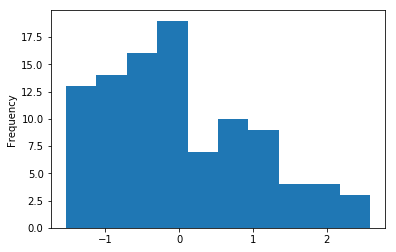

In [8]:
clm = 'Intensity of Deprivation Rural'
df_data_std[clm].plot(kind='hist')

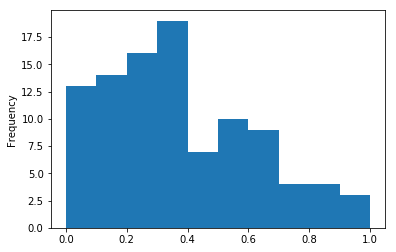

In [9]:
df_data_norm[clm].plot(kind='hist')

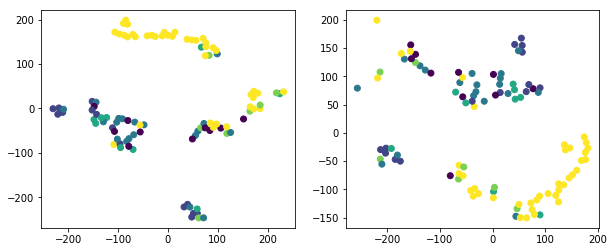

In [15]:
from sklearn.manifold import TSNE

X_std = df_data_std.as_matrix()
X_norm = df_data_norm.as_matrix()

perp = 5
tsne = TSNE(perplexity=perp)

X2d1 = tsne.fit_transform(X_std)
X2d2 = tsne.fit_transform(X_norm)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].scatter(X2d1[:,0], X2d1[:,1], c=target_y)
axes[1].scatter(X2d2[:,0], X2d2[:,1], c=target_y)

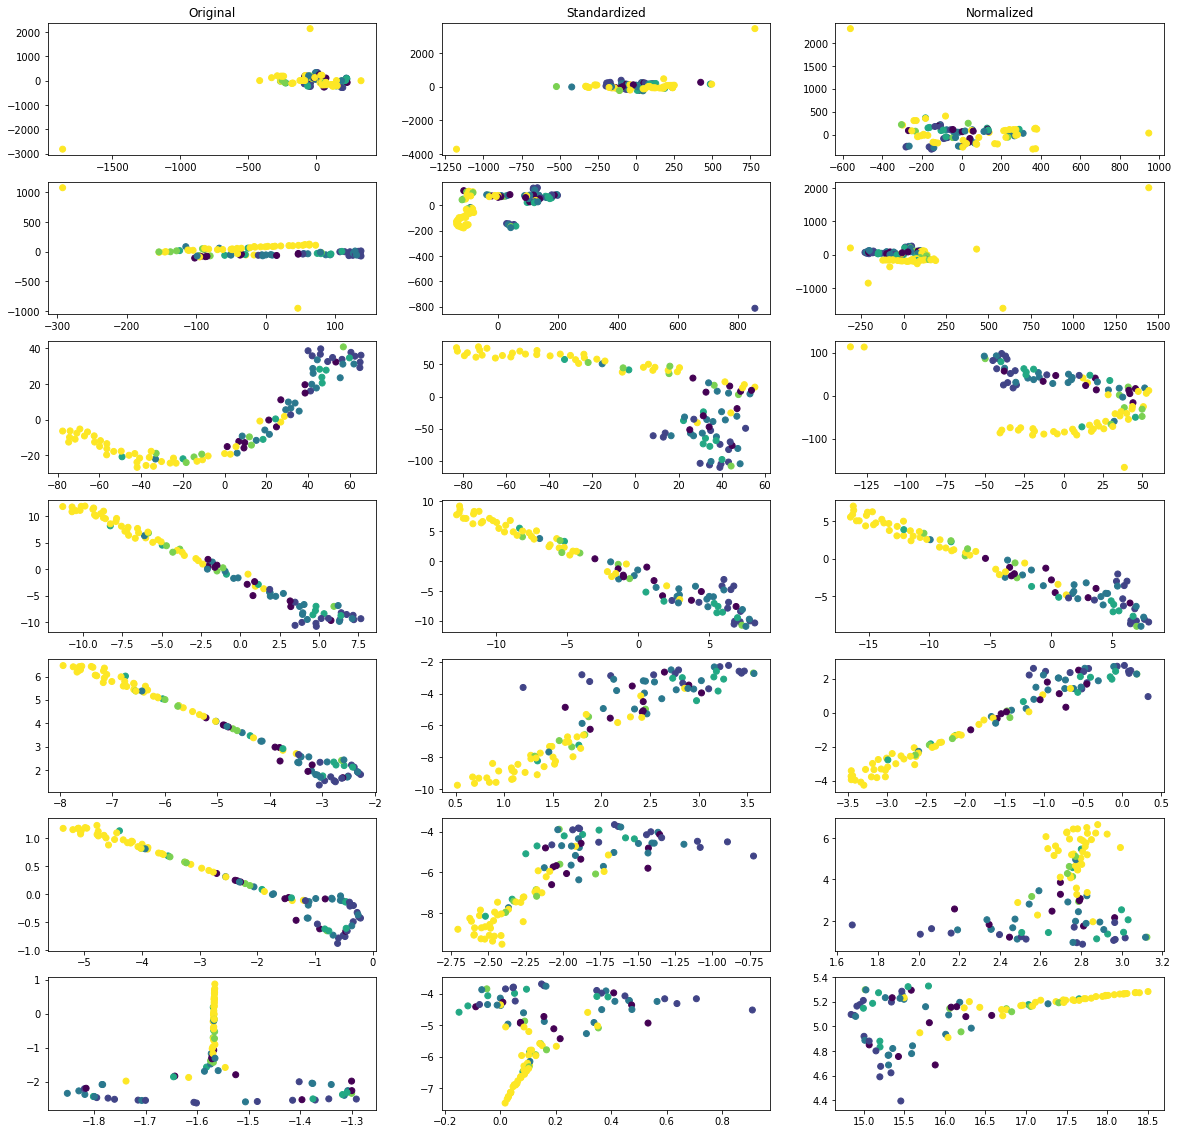

In [16]:
from sklearn.manifold import TSNE

X_original = df_data.as_matrix()
X_std = df_data_std.as_matrix()
X_norm = df_data_norm.as_matrix()
fig, axes = plt.subplots(7, 3, figsize=(20,20))
axes[0][0].set_title('Original')
axes[0][1].set_title('Standardized')
axes[0][2].set_title('Normalized')

perps = [2, 5, 10, 20, 50, 60, 75]

for i, perp in enumerate(perps):
    tsne = TSNE(perplexity=perp)
    X2d0 = tsne.fit_transform(X_original)
    X2d1 = tsne.fit_transform(X_std)
    X2d2 = tsne.fit_transform(X_norm)
    
    axes[i][0].scatter(X2d0[:,0], X2d0[:,1], c=target_y)
    axes[i][1].scatter(X2d1[:,0], X2d1[:,1], c=target_y)
    axes[i][2].scatter(X2d2[:,0], X2d2[:,1], c=target_y)
    
plt.show()

In [8]:
pickle_data = {
    'data': df_data_std.as_matrix(),
    'y': np.array(target_y),
    'labels': target_name
}

pickle.dump(pickle_data, open('MPI_national.pickle', 'wb'))

In [9]:
def load_pickle(name, limit_size=2000):
    inputName = '{}.pickle'.format(name)
    dataset = pickle.load(open(inputName, 'rb'))
    X, labels = dataset['data'], dataset['labels']
    n = min(limit_size, X.shape[0])
    X = X[:n]
    labels = labels[:n]
    if 'y' in dataset:
        y = dataset['y'][:n]
    else:
        y = np.zeros(n)
    print("Data from pickle: ", X.shape, y.shape, len(labels))
    return X, y, labels

# test load pickle file
load_pickle('MPI_national')

Data from pickle:  (99, 6) (99,) 99


(array([[ -8.23007846e-01,  -8.97679259e-01,  -1.61342211e+00,
          -1.05893545e+00,  -1.19732449e+00,  -1.53434893e+00],
        [ -8.23007846e-01,  -8.92219057e-01,  -3.88776412e-02,
          -1.04894835e+00,  -1.18489081e+00,  -7.37508546e-01],
        [ -8.23007846e-01,  -8.92219057e-01,  -2.72143488e-01,
          -1.04395480e+00,  -1.17882560e+00,  -1.10177844e+00],
        [ -8.23007846e-01,  -8.92219057e-01,  -1.16632924e+00,
          -9.99012839e-01,  -1.10361699e+00,  -9.19643491e-01],
        [ -8.12263052e-01,  -8.86758855e-01,  -1.61342211e+00,
          -1.05394190e+00,  -1.18822667e+00,  -1.12454530e+00],
        [ -8.12263052e-01,  -8.81298653e-01,  -1.03025749e+00,
          -1.03896125e+00,  -1.16457235e+00,  -1.28391338e+00],
        [ -8.12263052e-01,  -8.75838451e-01,  -1.49678919e+00,
          -1.05394190e+00,  -1.19034949e+00,  -1.42051459e+00],
        [ -8.12263052e-01,  -8.81298653e-01,   1.16632924e-01,
          -1.04395480e+00,  -1.16942452e+00,  -1